# Upper Confidence Bound Algorithm

Importer les librairies numpy, matplotlib.pyplot, pandas, math

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

Importer le fichier 'Ads_CTR_Optimisation.csv'
Afficher les 10 premières lignes pour voir les données

In [82]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


 Initialisez les variables necessaires : 
 N (nombre d'iterations egale le nombre de lignes dans le dataset), 
 number_ads (nombre de publicites a afficher = nombre de colonnes)

In [83]:
N, number_ads = dataset.shape
N, number_ads

(10000, 10)

Initialisez les 4 variables ci-dessous sous forme de listes d'entiers stockant les resultats d'affichage (nombre d'affichage de chaque publicite, nombre de clicks de chaque publicite, le taux de clicks de chaque publicite, le ucb de chaque publicite)
Initialisez toutes les listes a zero, sauf ucb qui devrait etre initialise a 1e400, puis multipliez chaque liste par le nombre de publicités.

In [84]:
number_of_display = np.zeros(number_ads) 
number_of_clicks = np.zeros(number_ads)
taux_de_click = np.zeros(number_ads)
ucb = np.dot(np.ones(number_ads), 1e400)

In [85]:
print(number_of_display)
print(number_of_clicks)
print(taux_de_click)
print(ucb)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf]


On initialise une liste pour sauvegarder l'historique des actions 

In [86]:
display_history = []

Définissez une fonction qui calcule le taux de click pour une publicité donnée. 
Il faut diviser le nombre de fois où cette publicité a été cliquée par le nombre de fois qu'elle a été affichée. Attention à la division par zéro !!!

In [87]:
def calcul_taux_de_click(ad_index):
    if number_of_display[ad_index] == 0:
        return 0
    else:
        return number_of_clicks[ad_index] / number_of_display[ad_index]  

Définissez une fonction qui vérifie si la publicité affichée a été cliquée ou pas. Elle va  chercher dans le dataset la valeur 0 ou 1 suivant le numéro d'internaute et le numéro de la publicité affichée. Vous pouvez utiliser une méthode dataset.values[row, column] de l'objet dataset.

In [88]:
def get_result_from_file(row, column):
    return dataset.values[row, column]   

Définissez une fonction qui calcule l'intervalle de confiance (DELTA). La formule magique est dans le cours, mais c'est aussi une racine carrée du :
    logarithme de N divisé par le nombre de fois que la publicité a été affichée. 
    coeficient 3/2
Attention à la division par zéro et au log de zéro !!!
Vous pouvez ajouter + 1 par exemple


In [89]:
def calcul_delta (n, ad_index):
    return math.sqrt(3/2 * math.log(n + 1) / number_of_display[ad_index])

La dernière fonction : calculer le UCB pour une publicité donnée. Ceci est vraiment simple. C'est la valeur maximale de taux de clics plus delta, elle appelle donc la fonction précédente. Si le nombre d'affichages de la publicité donnée est égal à zéro, retourner 1e400.

In [90]:
def calcul_UCB (n, ad_index):
    if number_of_display[ad_index] > 0 :
        return (taux_de_click[ad_index] + calcul_delta (n, ad_index))
    else:
        return 1e400

Ecrivez le corps de l'algorithme, tel que vu en cours.
A la fin de chaque itération ajoutez le code suivant
    if iteration % 1000 == 0 :
        display_history.append(number_of_display.copy())
Ceci va permettre d'enregistrer l'historique de modification de comportement de l'algorithme toutes les 1000 itérations.

In [91]:
# pour chaque iteration je cherche la meilleure publicite a afficher

for n in range(0, N):
    max_ucb = 0
    best_ad = 0

    # pour chaque publicite (action possible) je compare le ucb, et je garde index du meilleur ucb
    for ad_index in range(0, number_ads):
        
        # mettre a jour le tableau avec les taux de clicks
        taux_de_click[ad_index] = calcul_taux_de_click (ad_index)
        
        # mettre a jour le UCB pour chaque publicite
        ucb[ad_index] = calcul_UCB (n, ad_index)
        
        # trouver le meilleur ucb et la publicite a afficher
        if max_ucb < ucb[ad_index]:
            max_ucb = ucb[ad_index]
            best_ad = ad_index
    
    
    # verifier le resultat d'affichage de la publicite dans le fichier de simulation
    reward = get_result_from_file(n, best_ad)
    
    # mettre a jour le tableau d'affichages
    number_of_display[best_ad] += 1
        
    # mettre a jour le tableau de clicks
    if reward == 1:
        number_of_clicks[best_ad] += 1
        
    # ici memoriser historique des choix de l'algorithme apres chaque 1000 iterations
    if (n+1) % 500 == 0 :
        print("appending ", number_of_display)
        display_history.append(number_of_display.copy())

appending  [ 60.  51.  35.  35.  79.  31.  51.  81.  42.  35.]
appending  [ 109.   79.   53.   68.  287.   53.   86.  140.   64.   61.]
appending  [ 143.  102.   68.   98.  520.   68.  125.  192.   98.   86.]
appending  [ 200.  126.   86.  126.  685.   81.  142.  337.  117.  100.]
appending  [  243.   148.    98.   156.  1001.    88.   160.   372.   126.   108.]
appending  [  281.   213.   109.   188.  1226.    99.   184.   424.   157.   119.]
appending  [  318.   232.   117.   206.  1468.   106.   202.   540.   184.   127.]
appending  [  357.   245.   123.   254.  1780.   111.   215.   586.   196.   133.]
appending  [  370.   267.   126.   258.  2215.   114.   219.   595.   200.   136.]
appending  [  395.   273.   135.   265.  2587.   119.   229.   650.   206.   141.]
appending  [  412.   289.   146.   271.  2970.   123.   244.   689.   211.   145.]
appending  [  436.   315.   154.   297.  3230.   130.   255.   803.   221.   159.]
appending  [  577.   320.   157.   302.  3426.   134. 

# Visualisations

Félicitations ! Maintenant vous pouvez visualiser les résultats
(hint: la 5e publicité (=index 4) devrait être affichée environ 6.500 fois)

In [92]:
number_of_display

array([  705.,   387.,   186.,   345.,  6323.,   150.,   292.,  1170.,
         256.,   186.])

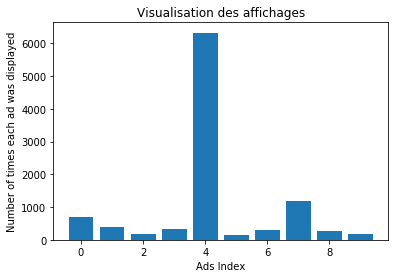

In [93]:
plt.bar(range(10), number_of_display)
plt.title('Visualisation des affichages')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed')
plt.show()

In [94]:
number_of_clicks

array([  1.20000000e+02,   4.70000000e+01,   7.00000000e+00,
         3.80000000e+01,   1.67500000e+03,   1.00000000e+00,
         2.70000000e+01,   2.36000000e+02,   2.00000000e+01,
         7.00000000e+00])

Calculer le nombre total de clics :

In [95]:
total_clicks = sum(number_of_clicks)
total_clicks

2178.0

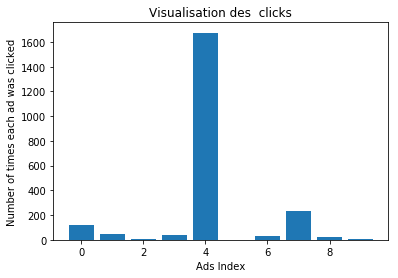

In [96]:
plt.bar(range(10), number_of_clicks)
plt.title('Visualisation des  clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was clicked')
plt.show()

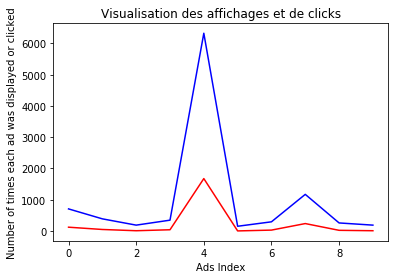

In [97]:
plt.plot(number_of_display, color="blue")
plt.plot(number_of_clicks, color="red")
plt.title('Visualisation des affichages et de clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed or clicked')
plt.show()

In [98]:
d = pd.DataFrame(display_history)
d

,0,1,2,3,4,5,6,7,8,9
0,60.0,51.0,35.0,35.0,79.0,31.0,51.0,81.0,42.0,35.0
1,109.0,79.0,53.0,68.0,287.0,53.0,86.0,140.0,64.0,61.0
2,143.0,102.0,68.0,98.0,520.0,68.0,125.0,192.0,98.0,86.0
3,200.0,126.0,86.0,126.0,685.0,81.0,142.0,337.0,117.0,100.0
4,243.0,148.0,98.0,156.0,1001.0,88.0,160.0,372.0,126.0,108.0
5,281.0,213.0,109.0,188.0,1226.0,99.0,184.0,424.0,157.0,119.0
6,318.0,232.0,117.0,206.0,1468.0,106.0,202.0,540.0,184.0,127.0
7,357.0,245.0,123.0,254.0,1780.0,111.0,215.0,586.0,196.0,133.0
8,370.0,267.0,126.0,258.0,2215.0,114.0,219.0,595.0,200.0,136.0
9,395.0,273.0,135.0,265.0,2587.0,119.0,229.0,650.0,206.0,141.0


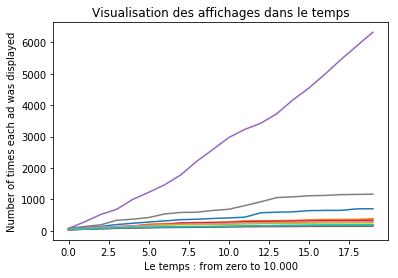

In [99]:
for i in range (0,10):
    plt.plot(d[i])
plt.title('Visualisation des affichages dans le temps')
plt.xlabel('Le temps : from zero to 10.000')
plt.ylabel('Number of times each ad was displayed')
plt.show()

# Random sampling

Maintenant vous pouvez faire la même chose en choisissant une publicité au hasard random(0,9) 
et comparer les résultats.
Ce qu'il faut surtout comparer c'est le nombre total de clics dans les deux cas.